In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Data Visualization
import plotly.express as px


In [2]:
exams_df = pd.read_csv('exams.csv')

In [3]:
exams_df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
exams_df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82
999,male,group A,some college,standard,completed,65,60,62


In [5]:
exams_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
exams_df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [7]:
exams_df.shape

(1000, 8)

In [8]:
exams_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
exams_df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
exams_df = exams_df.rename(columns={'race/ethnicity':'race_ethnicity',
                        'parental level of education':'parental_education',
                        'test preparation course':'test_preparation_course',
                        'math score':'math_score',
                        'reading score':'reading_score',
                        'writing score':'writing_score'})

In [11]:
gender_name = exams_df.gender.value_counts().index

In [12]:
gender_val = exams_df.gender.value_counts().values

In [13]:
gender_name

Index(['male', 'female'], dtype='object')

In [14]:
gender_val

array([517, 483])

([<matplotlib.patches.Wedge at 0x7fa2eed0fad0>,
 [Text(-0.05871992619937442, 1.0984315956249346, 'male'),
  Text(0.058720029041962135, -1.0984315901271737, 'female')],
 [Text(-0.03202905065420423, 0.5991445067045098, '51.70%'),
  Text(0.03202910675016116, -0.599144503705731, '48.30%')])

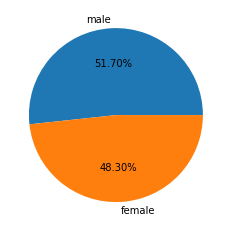

In [15]:
plt.pie(gender_val,labels=gender_name,autopct='%1.2f%%')

In [16]:
parental_education_level = exams_df.parental_education.value_counts().index

In [17]:
parental_education_level_val = exams_df.parental_education.value_counts().values

In [18]:
parental_education_level

Index(['some college', 'associate's degree', 'high school', 'some high school',
       'bachelor's degree', 'master's degree'],
      dtype='object')

In [19]:
parental_education_level_val


array([222, 203, 202, 191, 112,  70])

([<matplotlib.patches.Wedge at 0x7fa2ee84de50>,
 [Text(0.9964409013476772, 0.8349284580857386, 'some college'),
  Text(-0.4901302142457826, 0.9847702133408501, "associate's degree"),
  Text(-1.0853545380256582, -0.17890088537262816, 'high school'),
  Text(-0.18912198392882923, -1.0836202633740402, 'some high school'),
  Text(0.7729149934528926, -0.7826892185891633, "bachelor's degree"),
  Text(1.1711001263358338, -0.26177183594916076, "master's degree")],
 [Text(0.6131944008293397, 0.5138021280527622, '22.20%'),
  Text(-0.2673437532249723, 0.5371473890950091, '20.30%'),
  Text(-0.5920115661958135, -0.09758230111234262, '20.20%'),
  Text(-0.10315744577936138, -0.5910655982040218, '19.10%'),
  Text(0.4215899964288505, -0.42692139195772544, '11.20%'),
  Text(0.6831417403625697, -0.1527002376370104, '7.00%')])

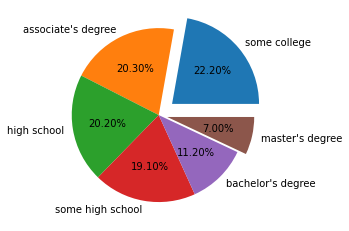

In [20]:
plt.pie(parental_education_level_val,labels=parental_education_level,autopct='%0.2f%%',explode=[0.2,0,0,0,0,0.1])

In [21]:
preparation_index = exams_df.test_preparation_course.value_counts().index

In [22]:
preparation_value = exams_df.test_preparation_course.value_counts().values

In [23]:
preparation_index

Index(['none', 'completed'], dtype='object')

In [24]:
preparation_value

array([665, 335])

([<matplotlib.patches.Wedge at 0x7fa2ee7c2590>,
 [Text(-0.5450045996867513, 0.955494629142563, '665'),
  Text(0.5450046891466118, -0.9554945781155461, '335')],
 [Text(-0.2972752361927734, 0.5211788886232162, '66.50%'),
  Text(0.297275284989061, -0.5211788607902977, '33.50%')])

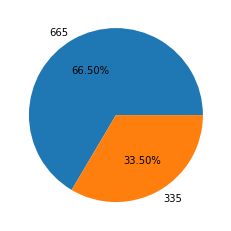

In [25]:
plt.pie(preparation_value,labels=preparation_value,autopct='%1.2f%%')

In [26]:
exams_df.groupby(['test_preparation_course']).mean()

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.686567,74.089552,74.671642
none,64.738346,66.439098,64.245113


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


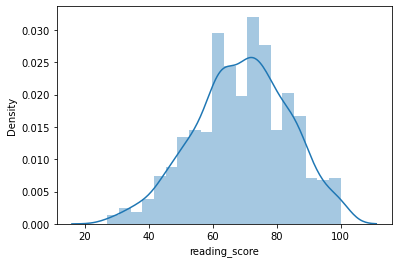

In [27]:
sns.distplot(exams_df["reading_score"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


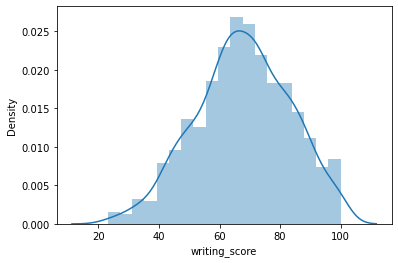

In [28]:
sns.distplot(exams_df["writing_score"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


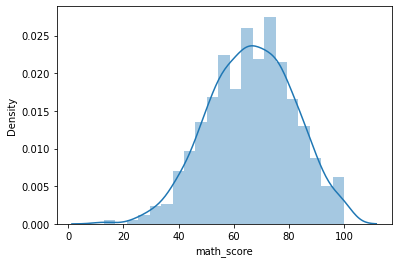

In [29]:
sns.distplot(exams_df["math_score"])

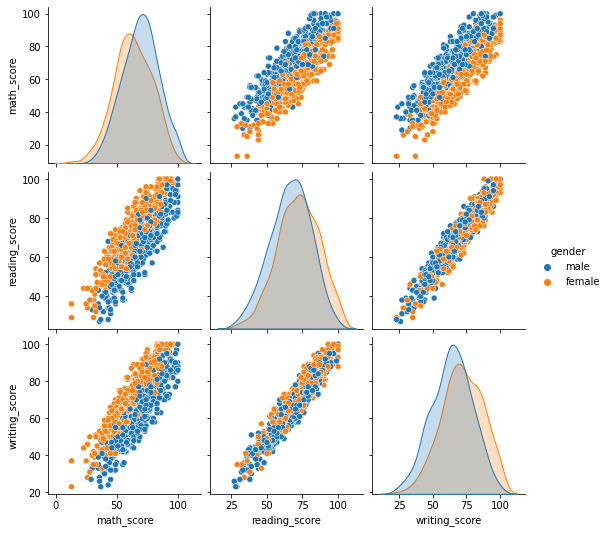

In [30]:
sns.pairplot(exams_df,hue="gender")

In [31]:
#Math Score Distribution
fig = px.box(data_frame=exams_df, x='math_score', color='gender')
fig.show()

# Reading Score Distribution
fig = px.box(data_frame=exams_df, x='reading_score', color='gender')
fig.show()

# Writing Score Distribution
fig = px.box(data_frame=exams_df, x='writing_score', color='gender')
fig.show()

Insights
#Math Score

The Average Math Score of Females is less than that of Males.

The range of Math Scores for Females is lower than the range of Math Score for Males.

#Reading Score
Females have High Reading score than Males.

#Writing Score
It seems like Males are only good at Math.

In [32]:
# Math Score Distribution
fig = px.box(data_frame=exams_df, x='math_score', color='race_ethnicity')
fig.show()

# Reading Score Distribution
fig = px.box(data_frame=exams_df, x='reading_score', color='race_ethnicity')
fig.show()

# Writing Score Distribution
fig = px.box(data_frame=exams_df, x='writing_score', color='race_ethnicity')
fig.show()

#Math Score
Group E have High Math Score range, followed by Group D and Group A.

#Reading Score
Again, Group E have High Reading Score range, followed by Group D and Group A.

#Writing Score
In case of Writing Score, Group D has a lead followed by Group E.

In [33]:
# Math Score Distribution
fig = px.box(data_frame=exams_df, x='math_score', color='parental_education')
fig.show()

# Reading Score Distribution
fig = px.box(data_frame=exams_df, x='reading_score', color='parental_education')
fig.show()

# Writing Score Distribution
fig = px.box(data_frame=exams_df, x='writing_score', color='parental_education')
fig.show()

#Math Score
This makes complete sense, scores of individual's whose parents have a Master's & Bachelor's Degree have a High Math Score.

#Reading Score
This is also same to what we have observed in math score distribution. And to be honest, this makes sense to be true.

#Writing Score
It's the same results as the two above

In [34]:
#perform two-way ANOVA
model = ols('math_score ~ C(gender) + C(parental_education) \
+ C(gender):C(parental_education)', data=exams_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(gender),8878.280255,1.0,41.108314,2.227927e-10
C(parental_education),12857.912350,5.0,11.906970,3.302604e-11
C(gender):C(parental_education),1209.616494,5.0,1.120156,3.478091e-01
Residual,213381.188176,988.0,NaN,NaN


In [38]:
#perform two-way ANOVA
model = ols('reading_score ~ C(gender) + C(parental_education) \
+ C(gender):C(parental_education)',data=exams_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(gender),8157.110513,1.0,40.913732,2.451400e-10
C(parental_education),11623.481437,5.0,11.660011,5.747361e-11
C(gender):C(parental_education),583.260571,5.0,0.585094,7.114587e-01
Residual,196980.934458,988.0,NaN,NaN


In [39]:
#perform two-way ANOVA
model = ols('writing_score ~ C(gender) + C(parental_education) \
+ C(gender):C(parental_education)', data=exams_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(gender),15160.374693,1.0,71.577848,9.507445e-17
C(parental_education),18289.173162,5.0,17.270017,2.066040e-16
C(gender):C(parental_education),872.255987,5.0,0.823650,5.328495e-01
Residual,209260.974158,988.0,NaN,NaN
